In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cinci_1320 = pd.read_csv('./data/cinci1320.csv', index_col='Date_of_Payment', parse_dates=True).sort_index()

C:\Users\sarah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,18,19,47,48,49,50,51,52,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
cinci_1320.head()

,Change_Type,Covered_Recipient_Type,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,...,xarelto,victoza,humira,levemir,invokana,farxiga,entresto,chantix,myrbetriq,toujeo
Date_of_Payment,,,,,,,,,,,,,,,,,,,,,
2013-08-01,UNCHANGED,Covered Recipient Physician,148974,RODNEY,NaN,VIVIAN,NaN,8000 5 MILE RD,240,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,58931,PAUL,JOSEPH,FAVORITO,NaN,7575 5 MILE RD,NaN,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,812462,ALFRED,JAMES,SUGAWARA,NaN,8477 FOXCROFT DR,NaN,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,108863,MARK,A,MANEGOLD,NaN,2450 KIPLING AVE,SUITE 104,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,195441,MANOJKUMAR,S,SINGH,NaN,10600 MONTGOMERY RD,SUITE 200,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cinci_1320['Change_Type'].value_counts()

UNCHANGED    364686
CHANGED         726
ADD               1
Name: Change_Type, dtype: int64

In [5]:
cinci_1320['entresto'].value_counts()

0    361674
1      3739
Name: entresto, dtype: int64

In [6]:
entresto = cinci_1320[(cinci_1320['entresto']==1) & (cinci_1320['Number_of_Payments_Included_in_Total_Amount']==1)].copy()

In [7]:
entresto['entresto'].value_counts()

1    3739
Name: entresto, dtype: int64

In [8]:
entresto['Change_Type'].value_counts()

UNCHANGED    3739
Name: Change_Type, dtype: int64

In [9]:
entresto['entr_dollars'] = [k if ((i ==1) & (j ==1)) else 0 for i, j, k in zip(entresto['entresto'], entresto['Number_of_Payments_Included_in_Total_Amount'], entresto['Total_Amount_of_Payment_USDollars'])]

#Ben Peck helped me with this during office hours.  I was oh-so-close but not quite there!

In [10]:
entresto['entr_dollars'].sum()

169227.83

In [11]:
drop_cols = ['Change_Type','Covered_Recipient_Type',
'Physician_First_Name',
'Physician_Middle_Name',
'Physician_Last_Name',
'Physician_Name_Suffix',
'Recipient_Primary_Business_Street_Address_Line1',
'Recipient_Primary_Business_Street_Address_Line2',
'Recipient_City',
'Recipient_State',
'Recipient_Zip_Code',
'Recipient_Country',
'Physician_Primary_Type',
'Physician_Specialty',
'Physician_License_State_code1',
'Physician_License_State_code2',
'Physician_License_State_code3',
'Physician_License_State_code4',
'Physician_License_State_code5',
'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
'Form_of_Payment_or_Transfer_of_Value',
'City_of_Travel',
'State_of_Travel',
'Country_of_Travel',
'Physician_Ownership_Indicator',
'Third_Party_Payment_Recipient_Indicator',
'Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value',
'Charity_Indicator',
'Third_Party_Equals_Covered_Recipient_Indicator',
'Contextual_Information',
'Delay_in_Publication_Indicator',
'Dispute_Status_for_Publication',
'Related_Product_Indicator',
'Covered_or_Noncovered_Indicator_1',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Product_Category_or_Therapeutic_Area_1',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Associated_Drug_or_Biological_NDC_1',
'Covered_or_Noncovered_Indicator_2',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2',
'Product_Category_or_Therapeutic_Area_2',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2',
'Associated_Drug_or_Biological_NDC_2',
'Covered_or_Noncovered_Indicator_3',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3',
'Product_Category_or_Therapeutic_Area_3',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3',
'Associated_Drug_or_Biological_NDC_3',
'Covered_or_Noncovered_Indicator_4',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
'Product_Category_or_Therapeutic_Area_4',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4',
'Associated_Drug_or_Biological_NDC_4',
'Covered_or_Noncovered_Indicator_5',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5',
'Product_Category_or_Therapeutic_Area_5',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5',
'Associated_Drug_or_Biological_NDC_5', 
'Physician_Profile_ID', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
'Total_Amount_of_Payment_USDollars','Number_of_Payments_Included_in_Total_Amount', 
'Nature_of_Payment_or_Transfer_of_Value', 'Record_ID', 
'Payment_Publication_Date', 'Program_Year',
'xarelto', 'farxiga', 'victoza', 'humira', 'levemir',
'invokana', 'chantix', 'myrbetriq', 'toujeo']

In [12]:
entresto.drop(columns = drop_cols, inplace = True)

In [13]:
entresto['z_score'] = [ ((i - entresto['entr_dollars'].mean())/entresto['entr_dollars'].std()) for i in entresto['entr_dollars']]

In [14]:
entresto.shape

(3739, 13)

In [15]:
entrestob = entresto[(np.abs(entresto['z_score']) < 3)].copy()

In [16]:
entrestob.shape

(3699, 13)

In [17]:
entresto_wkly = entrestob.resample('w').sum()

In [18]:
entresto_wkly.head()

,entresto,entr_dollars,z_score
Date_of_Payment,,,
2013-10-13,6,1277.46,4.049412
2013-10-20,0,0.00,0.000000
2013-10-27,0,0.00,0.000000
2013-11-03,0,0.00,0.000000
2013-11-10,0,0.00,0.000000


In [19]:
entresto_wkly.sort_index()

,entresto,entr_dollars,z_score
Date_of_Payment,,,
2013-10-13,6,1277.46,4.049412
2013-10-20,0,0.00,0.000000
2013-10-27,0,0.00,0.000000
2013-11-03,0,0.00,0.000000
2013-11-10,0,0.00,0.000000
...,...,...,...
2020-12-06,2,33.70,-0.228740
2020-12-13,6,76.61,-0.784808
2020-12-20,7,111.35,-0.827159


Look at some plots

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

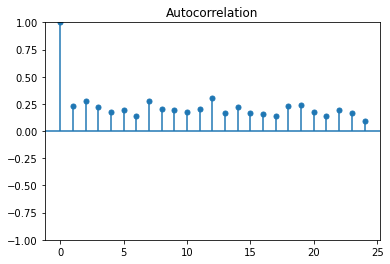

In [21]:
plot_acf(entresto_wkly['entr_dollars'], alpha=None, lags=24);

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


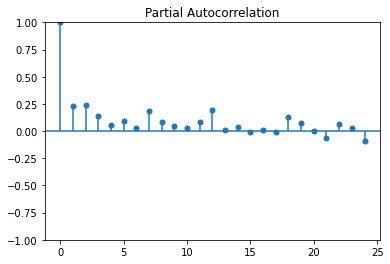

In [22]:
plot_pacf(entresto_wkly['entr_dollars'], alpha=None, lags=24);

Adding 1 to the weekly sales for each observation so that Holt_winters will work.

In [23]:
entresto_wkly['entr_dollars'] = [i+1 for i in entresto_wkly['entr_dollars']]

Set up Train and Test Sets using 2018, 2019 & 2020 Data

In [24]:
train = entresto_wkly.loc[:'2019-12-31']
train

,entresto,entr_dollars,z_score
Date_of_Payment,,,
2013-10-13,6,1278.46,4.049412
2013-10-20,0,1.00,0.000000
2013-10-27,0,1.00,0.000000
2013-11-03,0,1.00,0.000000
2013-11-10,0,1.00,0.000000
...,...,...,...
2019-12-01,6,108.62,-0.659972
2019-12-08,11,137.36,-1.455286
2019-12-15,16,614.36,-0.446056


In [25]:
train['entr_dollars'].max()

1922.04

In [26]:
train.describe()

,entresto,entr_dollars,z_score
count,325.000000,325.000000,325.000000
mean,10.575385,229.633569,-1.006458
std,9.039250,290.483473,1.197555
min,0.000000,1.000000,-4.069165
25%,0.000000,1.000000,-1.925970
50%,11.000000,163.190000,-0.988995
75%,18.000000,304.280000,0.000000
max,33.000000,1922.040000,4.453821


In [27]:
train.index.freq = 'W' 

In [28]:
train.shape

(325, 3)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 2013-10-13 to 2019-12-29
Freq: W-SUN
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   entresto      325 non-null    int64  
 1   entr_dollars  325 non-null    float64
 2   z_score       325 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 10.2 KB


In [30]:
train.index

DatetimeIndex(['2013-10-13', '2013-10-20', '2013-10-27', '2013-11-03',
               '2013-11-10', '2013-11-17', '2013-11-24', '2013-12-01',
               '2013-12-08', '2013-12-15',
               ...
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01', '2019-12-08', '2019-12-15',
               '2019-12-22', '2019-12-29'],
              dtype='datetime64[ns]', name='Date_of_Payment', length=325, freq='W-SUN')

In [31]:
test = entresto_wkly.loc['2020-01-01':]
test

,entresto,entr_dollars,z_score
Date_of_Payment,,,
2020-01-05,1,24.21,-0.088767
2020-01-12,22,310.15,-2.763917
2020-01-19,11,144.47,-1.426663
2020-01-26,12,311.81,-0.935211
2020-02-02,15,208.91,-1.896059
2020-02-09,7,136.14,-0.731388
2020-02-16,18,327.42,-1.965584
2020-02-23,3,46.01,-0.365412
2020-03-01,22,953.79,-0.172838


In [32]:
test.describe()

,entresto,entr_dollars,z_score
count,53.000000,53.000000,53.000000
mean,4.943396,87.753208,-0.551459
std,5.722476,147.700087,0.628119
min,0.000000,1.000000,-2.763917
25%,0.000000,1.000000,-0.864517
50%,3.000000,46.010000,-0.365412
75%,7.000000,103.070000,0.000000
max,22.000000,953.790000,0.000000


In [33]:
test.shape

(53, 3)

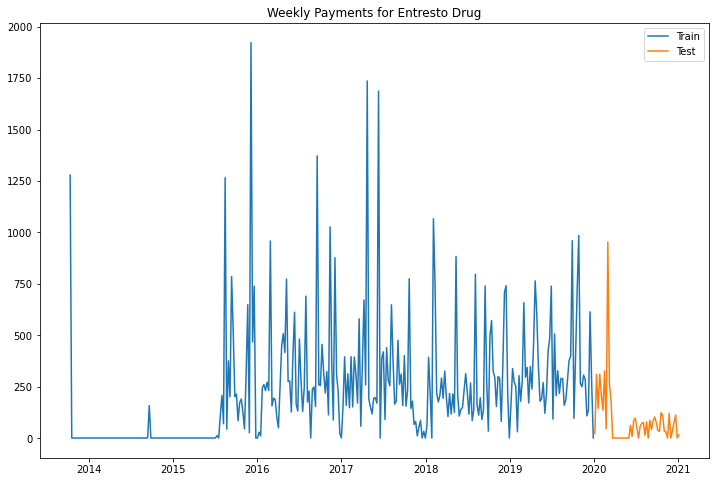

In [34]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['entr_dollars'], label='Train')
plt.plot(test.index, test['entr_dollars'], label='Test')

plt.legend(loc='best')
plt.title("Weekly Payments for Entresto Drug");

Baseline (Naive Model)

In [35]:
df_preds = test.copy(deep=True)
df_preds

,entresto,entr_dollars,z_score
Date_of_Payment,,,
2020-01-05,1,24.21,-0.088767
2020-01-12,22,310.15,-2.763917
2020-01-19,11,144.47,-1.426663
2020-01-26,12,311.81,-0.935211
2020-02-02,15,208.91,-1.896059
2020-02-09,7,136.14,-0.731388
2020-02-16,18,327.42,-1.965584
2020-02-23,3,46.01,-0.365412
2020-03-01,22,953.79,-0.172838


In [36]:
df_preds['simple_mean'] = train['entr_dollars'].mean()
df_preds

,entresto,entr_dollars,z_score,simple_mean
Date_of_Payment,,,,
2020-01-05,1,24.21,-0.088767,229.633569
2020-01-12,22,310.15,-2.763917,229.633569
2020-01-19,11,144.47,-1.426663,229.633569
2020-01-26,12,311.81,-0.935211,229.633569
2020-02-02,15,208.91,-1.896059,229.633569
2020-02-09,7,136.14,-0.731388,229.633569
2020-02-16,18,327.42,-1.965584,229.633569
2020-02-23,3,46.01,-0.365412,229.633569
2020-03-01,22,953.79,-0.172838,229.633569


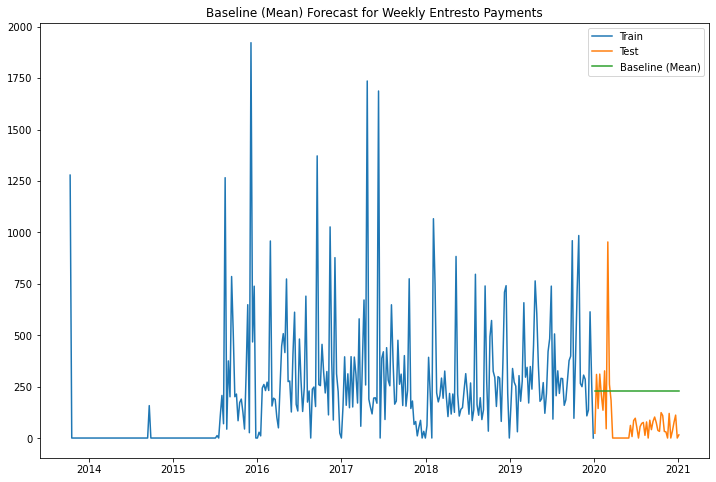

In [37]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['entr_dollars'], label='Train')
plt.plot(test.index, test['entr_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['simple_mean'], label="Baseline (Mean)")

plt.legend(loc='best')
plt.title("Baseline (Mean) Forecast for Weekly Entresto Payments");

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
print("MAE for Simple Mean Baseline Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['simple_mean']))
print("RMSE for Simple Mean Baseline Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['simple_mean'], squared=False))

MAE for Simple Mean Baseline Model: 180.25780145137878
RMSE for Simple Mean Baseline Model: 203.79828995628287


Make a Seasonal Baseline Model with shift of 7

In [40]:
df_preds['seasonal_7'] = train['entr_dollars'].shift(7, freq='W-SUN') 
df_preds.head(2)

,entresto,entr_dollars,z_score,simple_mean,seasonal_7
Date_of_Payment,,,,,
2020-01-05,1,24.21,-0.088767,229.633569,306.78
2020-01-12,22,310.15,-2.763917,229.633569,286.20


In [41]:
df_preds['seasonal_7'].fillna(0, inplace=True)

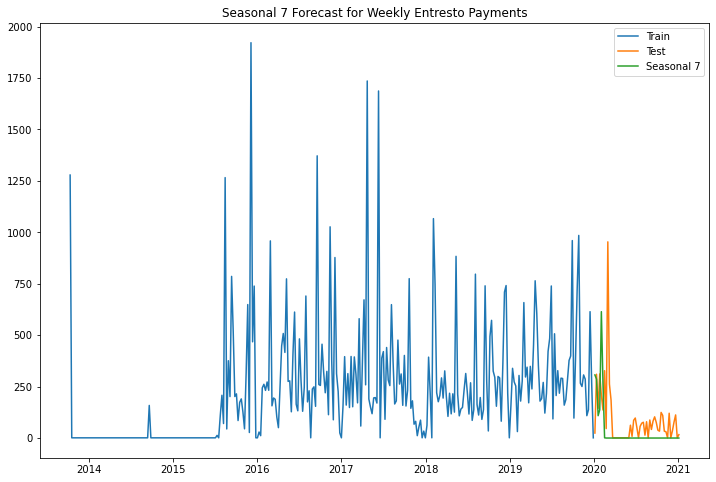

In [42]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['entr_dollars'], label='Train')
plt.plot(test.index, test['entr_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['seasonal_7'], label='Seasonal 7')

plt.legend(loc='best')
plt.title("Seasonal 7 Forecast for Weekly Entresto Payments");

In [43]:
print("MAE for Seasonal Baseline 7 Shift Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['seasonal_7']))
print("RMSE for Seasonal Baseline 7 Shift Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['seasonal_7'], squared=False))

MAE for Seasonal Baseline 7 Shift Model: 86.18377358490565
RMSE for Seasonal Baseline 7 Shift Model: 171.48480899771016


Seasonal Baseline Model with shift of 52

In [44]:
df_preds['seasonal_52'] = train['entr_dollars'].shift(52, freq='W-SUN') 
df_preds.head(2)

,entresto,entr_dollars,z_score,simple_mean,seasonal_7,seasonal_52
Date_of_Payment,,,,,,
2020-01-05,1,24.21,-0.088767,229.633569,306.78,159.18
2020-01-12,22,310.15,-2.763917,229.633569,286.20,338.95


In [45]:
df_preds['seasonal_52'].fillna(0, inplace=True)

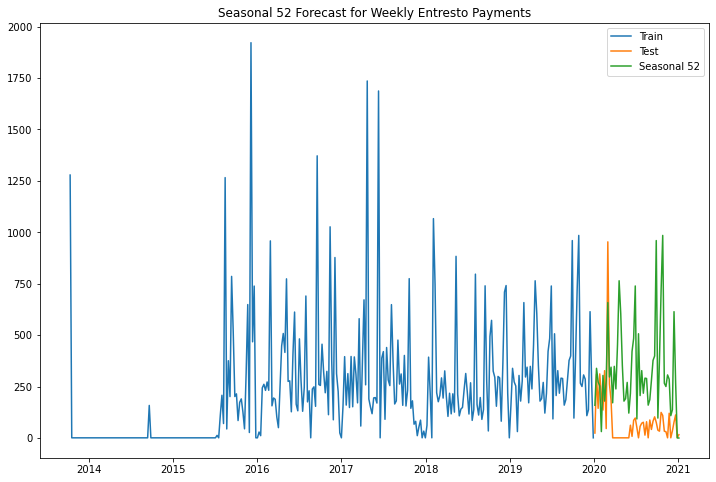

In [46]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['entr_dollars'], label='Train')
plt.plot(test.index, test['entr_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['seasonal_52'], label='Seasonal 52')

plt.legend(loc='best')
plt.title("Seasonal 52 Forecast for Weekly Entresto Payments");

In [47]:
print("MAE for Seasonal Baseline 52 Shift Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['seasonal_52']))
print("RMSE for Seasonal Baseline 52 Shift Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['seasonal_52'], squared=False))

MAE for Seasonal Baseline 52 Shift Model: 266.68905660377357
RMSE for Seasonal Baseline 52 Shift Model: 337.286087502348


Simple Exponential Smoothing Model

In [48]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

In [49]:
ses = SimpleExpSmoothing(train['entr_dollars']).fit(smoothing_level=.5)

In [50]:
ses.summary()

Dep. Variable:,entr_dollars,No. Observations:,325
Model:,SimpleExpSmoothing,SSE,28468795.017
Optimized:,True,AIC,3702.661
Trend:,None,BIC,3710.228
Seasonal:,None,AICC,3702.786
Seasonal Periods:,None,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,12:53:58
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,639.75624,l.0,True


In [51]:
ses_forecast = ses.forecast(len(test))

In [52]:
df_preds['ses'] = ses_forecast

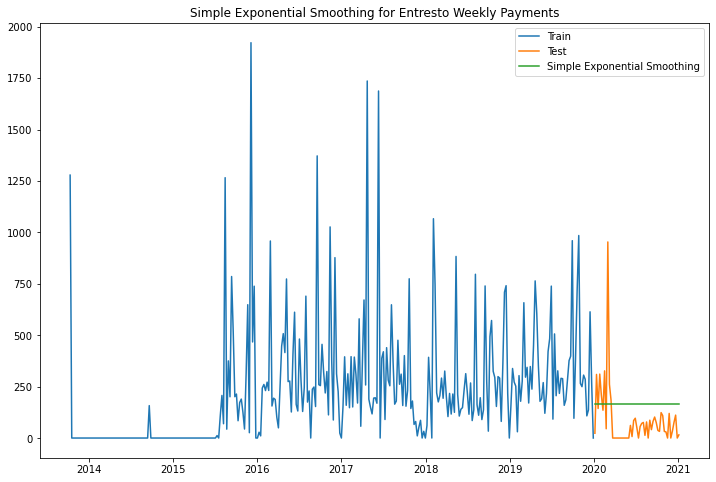

In [53]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['entr_dollars'], label='Train')
plt.plot(test.index, test['entr_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['ses'], label='Simple Exponential Smoothing')

plt.legend(loc='best')
plt.title("Simple Exponential Smoothing for Entresto Weekly Payments");

In [54]:
print("MAE for Simple Exponential Smoothing Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['ses']))
print("RMSE for Simple Exponential Smoothing Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['ses'], squared=False))

MAE for Simple Exponential Smoothing Model: 130.95274722814898
RMSE for Simple Exponential Smoothing Model: 165.90359238295656


Holt-Winters Multiplicative Model with Seasonality of 52

In [55]:
hw_m52 = ExponentialSmoothing(
    train['entr_dollars'],
    seasonal_periods=52, 
    trend='mul',
    seasonal='mul'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [56]:
hw_m52.summary()

Dep. Variable:,entr_dollars,No. Observations:,325
Model:,ExponentialSmoothing,SSE,32922554.269
Optimized:,True,AIC,3857.899
Trend:,Multiplicative,BIC,4069.793
Seasonal:,Multiplicative,AICC,3883.628
Seasonal Periods:,52,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,12:53:59
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0001,beta,True


In [57]:
df_preds['hw_m52'] = hw_m52.forecast(len(test))
df_preds.head(2)

,entresto,entr_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52
Date_of_Payment,,,,,,,,
2020-01-05,1,24.21,-0.088767,229.633569,306.78,159.18,165.985528,62.634543
2020-01-12,22,310.15,-2.763917,229.633569,286.20,338.95,165.985528,169.433607


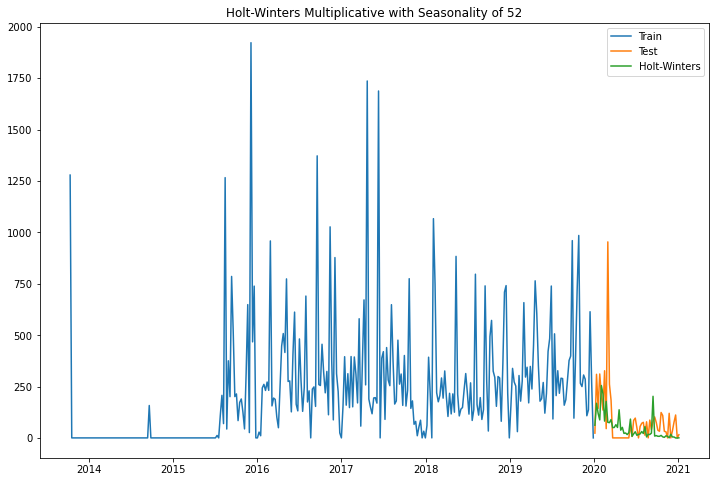

In [58]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['entr_dollars'], label='Train')
plt.plot(test.index, test['entr_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m52'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Multiplicative with Seasonality of 52");

In [59]:
print("MAE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['hw_m52']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['hw_m52'], squared=False))

MAE for Holt-Winters Multiplicative with Seasonality of 52 Model: 78.37550470778743
RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model: 145.61900569308543


Now, try an additive Holt-Winters Model with a seasonal period of 52.

In [60]:
hw_a52 = ExponentialSmoothing(
    train['entr_dollars'],
    seasonal_periods=52, 
    trend='add',
    seasonal='add'
).fit()

In [61]:
hw_a52.summary()

Dep. Variable:,entr_dollars,No. Observations:,325
Model:,ExponentialSmoothing,SSE,20528434.408
Optimized:,True,AIC,3704.386
Trend:,Additive,BIC,3916.281
Seasonal:,Additive,AICC,3730.116
Seasonal Periods:,52,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,12:53:59
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0758111,alpha,True
smoothing_trend,0.0001073,beta,True


In [62]:
df_preds['hw_a52'] = hw_a52.forecast(len(test))
df_preds.head(2)

,entresto,entr_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52
Date_of_Payment,,,,,,,,,
2020-01-05,1,24.21,-0.088767,229.633569,306.78,159.18,165.985528,62.634543,177.657706
2020-01-12,22,310.15,-2.763917,229.633569,286.20,338.95,165.985528,169.433607,316.194614


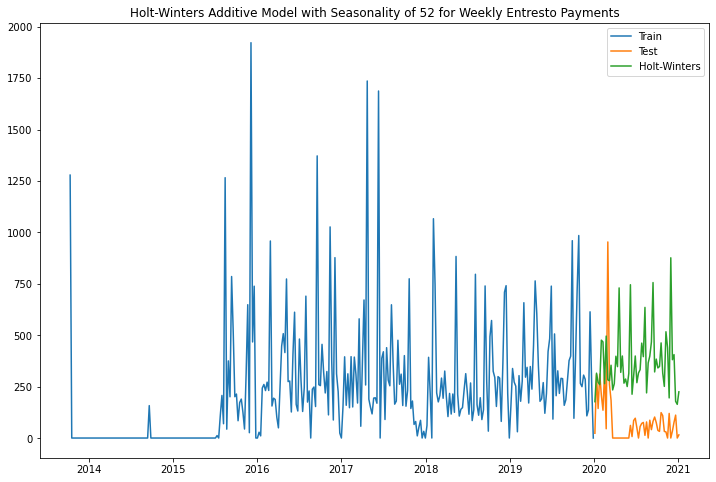

In [63]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['entr_dollars'], label='Train')
plt.plot(test.index, test['entr_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a52'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 52 for Weekly Entresto Payments");

In [64]:
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['hw_a52']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['hw_a52'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 52 Model: 311.1051509790227
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 359.921479726269


Now, try an additive Holt-Winters Model with a seasonal period of 7.

In [65]:
hw_a7 = ExponentialSmoothing(
    train['entr_dollars'],
    seasonal_periods=7, 
    trend='add',
    seasonal='add'
).fit()

In [66]:
hw_a7.summary()

Dep. Variable:,entr_dollars,No. Observations:,325
Model:,ExponentialSmoothing,SSE,23346655.424
Optimized:,True,AIC,3656.195
Trend:,Additive,BIC,3697.817
Seasonal:,Additive,AICC,3657.366
Seasonal Periods:,7,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,12:54:00
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0791389,alpha,True
smoothing_trend,0.0453327,beta,True


In [67]:
df_preds['hw_a7'] = hw_a7.forecast(len(test))
df_preds.head(2)

,entresto,entr_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52,hw_a7
Date_of_Payment,,,,,,,,,,
2020-01-05,1,24.21,-0.088767,229.633569,306.78,159.18,165.985528,62.634543,177.657706,318.444547
2020-01-12,22,310.15,-2.763917,229.633569,286.20,338.95,165.985528,169.433607,316.194614,327.591273


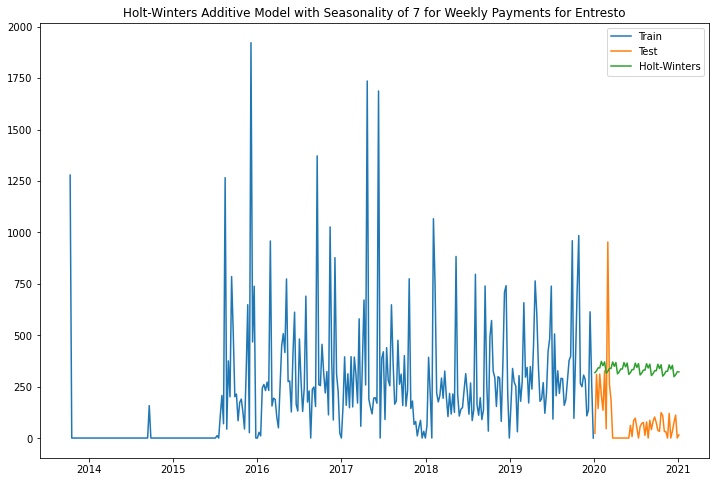

In [68]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['entr_dollars'], label='Train')
plt.plot(test.index, test['entr_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a7'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 7 for Weekly Payments for Entresto");

In [69]:
print("MAE for Holt-Winters Additive with Seasonality of 7 Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['hw_a7']))
print("RMSE for Holt-Winters Additive with Seasonality of 7 Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['hw_a7'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 7 Model: 272.4166085853638
RMSE for Holt-Winters Additive with Seasonality of 7 Model: 289.06764453323393


Now, try a multiplicative Holt-Winters Model with a seasonal period of 7.

In [70]:
hw_m7 = ExponentialSmoothing(
    train['entr_dollars'],
    seasonal_periods=7, 
    trend='mul',
    seasonal='mul'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [71]:
hw_m7.summary()

Dep. Variable:,entr_dollars,No. Observations:,325
Model:,ExponentialSmoothing,SSE,26335883.817
Optimized:,True,AIC,3695.351
Trend:,Multiplicative,BIC,3736.973
Seasonal:,Multiplicative,AICC,3696.521
Seasonal Periods:,7,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,12:54:01
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3232143,alpha,True
smoothing_trend,0.0001,beta,True


In [72]:
df_preds['hw_m7'] = hw_m7.forecast(len(test))
df_preds.head(2)

,entresto,entr_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52,hw_a7,hw_m7
Date_of_Payment,,,,,,,,,,,
2020-01-05,1,24.21,-0.088767,229.633569,306.78,159.18,165.985528,62.634543,177.657706,318.444547,109.522557
2020-01-12,22,310.15,-2.763917,229.633569,286.20,338.95,165.985528,169.433607,316.194614,327.591273,119.989527


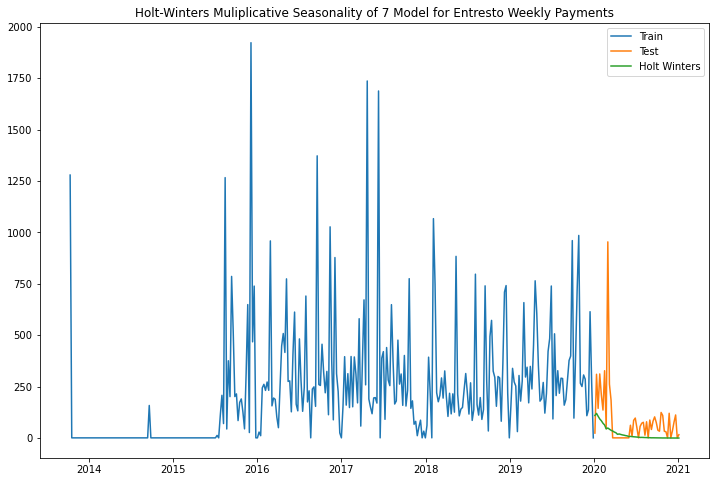

In [73]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['entr_dollars'], label='Train')
plt.plot(test.index, test['entr_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m7'], label='Holt Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Muliplicative Seasonality of 7 Model for Entresto Weekly Payments");

In [74]:
print("MAE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['hw_m7']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['hw_m7'], squared=False))

MAE for Holt-Winters Multiplicative with Seasonality of 7 Model: 77.82284777105755
RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model: 151.1671400645531


Try a SARIMA Model

In [75]:
from pmdarima.utils import tsdisplay

In [76]:
traina = train['entr_dollars']

C:\Users\sarah\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


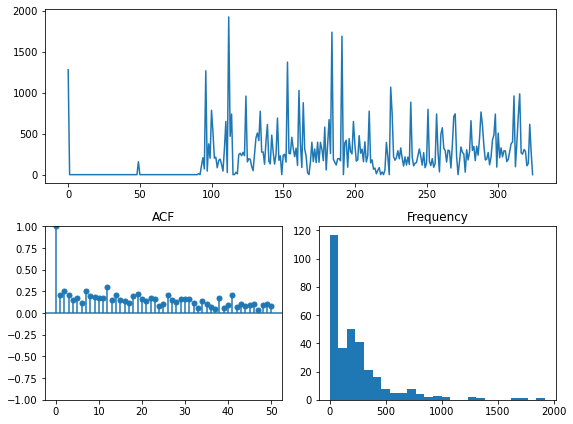

In [77]:
tsdisplay(traina)

In [78]:
import pmdarima as pmd
model_s7 = pmd.auto_arima(train['entr_dollars'], m=7, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=4552.621, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4739.151, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4635.536, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=4547.178, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4737.192, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=4547.038, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=4546.960, Time=0.14 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=4548.143, Time=0.44 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=4548.534, Time=0.24 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=4549.930, Time=0.71 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=4735.314, Time=0.08 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=4548.897, Time=0.28 sec
 ARIMA(0,1,2)(1,0,0)[7] intercept   : AIC=4548.906, Time=0.20 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=4550.953, Time=0.36 sec
 ARIMA(0,1,1)(1,0,0)[7]          

In [79]:
model_s7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  325
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 7)   Log Likelihood               -2269.864
Date:                            Mon, 14 Mar 2022   AIC                           4545.728
Time:                                    12:54:07   BIC                           4557.070
Sample:                                         0   HQIC                          4550.255
                                            - 325                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9399      0.018    -51.935      0.000      -0.975      -0.904
ar.S.L7        0.0844      0.037      2.310      0.021       0.013       0.156
sigma2      7.107e+04   2480.129     28.656      0.000    6.62e+04    7.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):              1924.16
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                             2.51
Prob(H) (two-sided):                  0.03   Kurtosis:                        13.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
preds_sar7 = model_s7.predict(test.shape[0])
preds_sar7

array([327.23215528, 325.49453214, 310.50098908, 312.92758232,
       353.20193776, 323.9055104 , 301.41435149, 328.95898415,
       328.81227209, 327.5463281 , 327.7512117 , 331.15168069,
       328.67810683, 326.77911956, 329.10478482, 329.09239753,
       328.98551058, 329.00280944, 329.28991991, 329.08106961,
       328.92073316, 329.11709515, 329.11604926, 329.10702451,
       329.1084851 , 329.13272659, 329.11509281, 329.10155519,
       329.11813454, 329.11804623, 329.11728425, 329.11740757,
       329.11945434, 329.11796548, 329.11682246, 329.1182223 ,
       329.11821484, 329.11815051, 329.11816092, 329.11833373,
       329.11820803, 329.11811152, 329.11822971, 329.11822908,
       329.11822365, 329.11822453, 329.11823912, 329.1182285 ,
       329.11822036, 329.11823033, 329.11823028, 329.11822982,
       329.1182299 ])

In [81]:
df_preds['sarima7_auto'] = preds_sar7
df_preds['sarima7_auto'].head(2)

Date_of_Payment
2020-01-05    327.232155
2020-01-12    325.494532
Freq: W-SUN, Name: sarima7_auto, dtype: float64

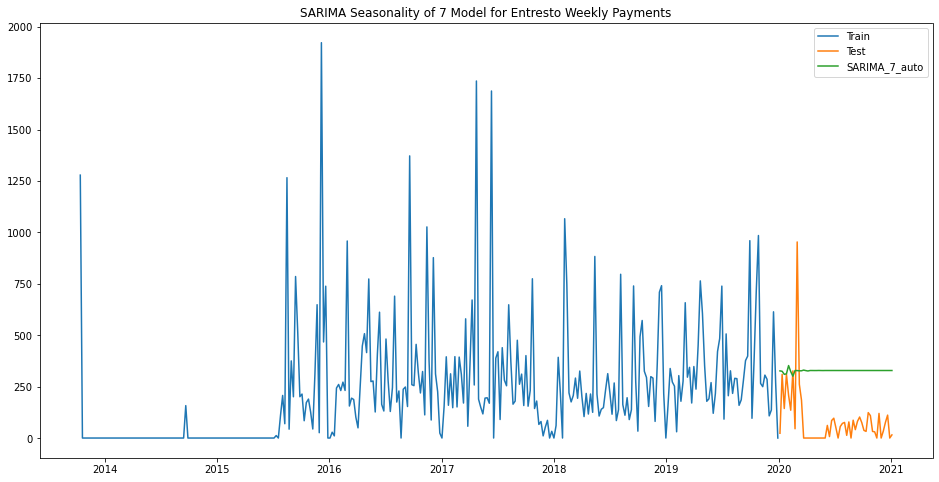

In [82]:
plt.figure(figsize=(16,8))
plt.plot(train['entr_dollars'], label='Train')
plt.plot(test['entr_dollars'], label='Test')
plt.plot(df_preds['sarima7_auto'], label='SARIMA_7_auto')
plt.legend(loc='best')
plt.title("SARIMA Seasonality of 7 Model for Entresto Weekly Payments");

In [83]:
print("MAE for SARIMA with Seasonality of 7 Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['sarima7_auto']))
print("RMSE for SARIMA with Seasonality of 7 Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['sarima7_auto'], squared=False))

MAE for SARIMA with Seasonality of 7 Model: 264.917543397935
RMSE for SARIMA with Seasonality of 7 Model: 282.10605419576063


Try a SARIMA Model with m = 52

In [84]:
model_s52 = pmd.auto_arima(train['entr_dollars'], m=52, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=4553.973, Time=8.77 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=4739.151, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=4637.677, Time=1.76 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=4547.886, Time=1.85 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=4737.192, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=4547.038, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=4547.808, Time=1.69 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=4.88 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=4549.037, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=4549.037, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=4637.934, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=4550.924, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[52]             : AIC=4545.798, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[52]             : AIC=4546.427, Time=1.05 sec
 ARIMA(0,1,1)(0,0,1)[52]

In [85]:
model_s52.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  325
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2270.899
Date:                Mon, 14 Mar 2022   AIC                           4545.798
Time:                        12:54:34   BIC                           4553.360
Sample:                             0   HQIC                          4548.816
                                - 325                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9341      0.019    -50.314      0.000      -0.970      -0.898
sigma2      7.153e+04   2318.785     30.847      0.000     6.7e+04    7.61e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):              2055.42
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                             2.57
Prob(H) (two-sided):                  0.03   Kurtosis:                        14.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
preds_sar52 = model_s52.predict(test.shape[0])
preds_sar52

array([332.76088411, 332.76088411, 332.76088411, 332.76088411,
       332.76088411, 332.76088411, 332.76088411, 332.76088411,
       332.76088411, 332.76088411, 332.76088411, 332.76088411,
       332.76088411, 332.76088411, 332.76088411, 332.76088411,
       332.76088411, 332.76088411, 332.76088411, 332.76088411,
       332.76088411, 332.76088411, 332.76088411, 332.76088411,
       332.76088411, 332.76088411, 332.76088411, 332.76088411,
       332.76088411, 332.76088411, 332.76088411, 332.76088411,
       332.76088411, 332.76088411, 332.76088411, 332.76088411,
       332.76088411, 332.76088411, 332.76088411, 332.76088411,
       332.76088411, 332.76088411, 332.76088411, 332.76088411,
       332.76088411, 332.76088411, 332.76088411, 332.76088411,
       332.76088411, 332.76088411, 332.76088411, 332.76088411,
       332.76088411])

In [87]:
df_preds['sarima52_auto'] = preds_sar52
df_preds['sarima52_auto'].head(2)

Date_of_Payment
2020-01-05    332.760884
2020-01-12    332.760884
Freq: W-SUN, Name: sarima52_auto, dtype: float64

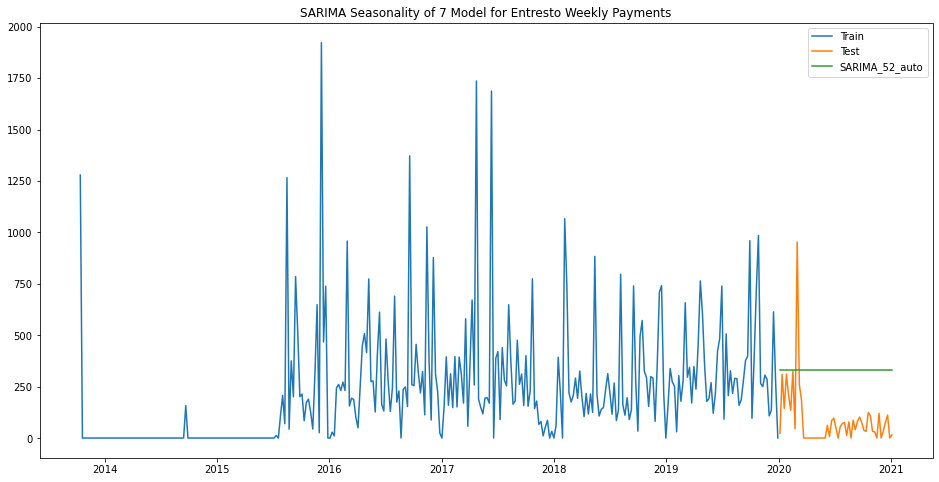

In [88]:
plt.figure(figsize=(16,8))
plt.plot(train['entr_dollars'], label='Train')
plt.plot(test['entr_dollars'], label='Test')
plt.plot(df_preds['sarima52_auto'], label='SARIMA_52_auto')
plt.legend(loc='best')
plt.title("SARIMA Seasonality of 7 Model for Entresto Weekly Payments");

In [89]:
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['sarima52_auto']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['sarima52_auto'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 52 Model: 268.4427375371289
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 285.3637459997093


In [90]:
print("Summary of Metrics for Weekly Entresto CMS Payments")
print("_________________________________________________")
print("MAE for Simple Mean Baseline Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['simple_mean']))
print("RMSE for Simple Mean Baseline Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['simple_mean'], squared=False))
print("_________________________________________________")
print("MAE for Seasonal Baseline 7 Shift Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['seasonal_7']))
print("RMSE for Seasonal Baseline 7 Shift Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['seasonal_7'], squared=False))
print("_________________________________________________")
print("MAE for Seasonal Baseline 52 Shift Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['seasonal_52']))
print("RMSE for Seasonal Baseline 52 Shift Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['seasonal_52'], squared=False))
print("_________________________________________________")
print("MAE for Simple Exponential Smoothing Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['ses']))
print("RMSE for Simple Exponential Smoothing Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['ses'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['hw_m7']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['hw_m7'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['hw_m52']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['hw_m52'], squared=False))
print("_________________________________________________")


Summary of Metrics for Weekly Entresto CMS Payments
_________________________________________________
MAE for Simple Mean Baseline Model: 180.25780145137878
RMSE for Simple Mean Baseline Model: 203.79828995628287
_________________________________________________
MAE for Seasonal Baseline 7 Shift Model: 86.18377358490565
RMSE for Seasonal Baseline 7 Shift Model: 171.48480899771016
_________________________________________________
MAE for Seasonal Baseline 52 Shift Model: 266.68905660377357
RMSE for Seasonal Baseline 52 Shift Model: 337.286087502348
_________________________________________________
MAE for Simple Exponential Smoothing Model: 130.95274722814898
RMSE for Simple Exponential Smoothing Model: 165.90359238295656
_________________________________________________
MAE for Holt-Winters Multiplicative with Seasonality of 7 Model: 77.82284777105755
RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model: 151.1671400645531
_________________________________________________
MA

In [91]:
print("Continued Summary of Metrics for Weeky Entresto CMS Payments")
print("_________________________________________________")
print("MAE for Holt-Winters Additive with Seasonality of 7 Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['hw_a7']))
print("RMSE for Holt-Winters Additive with Seasonality of 7 Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['hw_a7'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['hw_a52']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['hw_a52'], squared=False))
print("_________________________________________________")
print("MAE for SARIMA with Seasonality of 7 Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['sarima7_auto']))
print("RMSE for SARIMA with Seasonality of 7 Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['sarima7_auto'], squared=False))
print("_________________________________________________")
print("MAE for SARIMA with Seasonality of 52 Model:", mean_absolute_error(df_preds['entr_dollars'], df_preds['sarima52_auto']))
print("RMSE for SARIMA with Seasonality of 52 Model:", mean_squared_error(df_preds['entr_dollars'], df_preds['sarima52_auto'], squared=False))
print("_________________________________________________")

Continued Summary of Metrics for Weeky Entresto CMS Payments
_________________________________________________
MAE for Holt-Winters Additive with Seasonality of 7 Model: 272.4166085853638
RMSE for Holt-Winters Additive with Seasonality of 7 Model: 289.06764453323393
_________________________________________________
MAE for Holt-Winters Additive with Seasonality of 52 Model: 311.1051509790227
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 359.921479726269
_________________________________________________
MAE for SARIMA with Seasonality of 7 Model: 264.917543397935
RMSE for SARIMA with Seasonality of 7 Model: 282.10605419576063
_________________________________________________
MAE for SARIMA with Seasonality of 52 Model: 268.4427375371289
RMSE for SARIMA with Seasonality of 52 Model: 285.3637459997093
_________________________________________________
